In [1]:
import os
import pandas as pd
import numpy as np
import time

In [2]:
df=pd.read_csv(r'data/AURN_data_download/Westminster/MY1.csv',parse_dates=['date'],index_col='date')

In [3]:
df

,O3,NO,NO2,NOXasNO2,SO2,CO,PM10,NV10,V10,PM2.5,...,AP10,AT2.5,AP2.5,site,code,latitude,longitude,location_type,Ox,NOx
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1.72961,78.38595,45.77784,165.96796,4.75424,NaN,69.0,60.0,9.0,58.1,...,1026.2,4.7,1025.2,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.960024,83.832703
2020-01-01 01:00:00,1.92918,88.61587,52.64325,188.51903,4.84394,0.397528,45.0,38.4,6.6,43.2,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,27.524407,95.223555
2020-01-01 02:00:00,1.99570,70.02935,44.76870,152.14554,3.09474,0.346417,46.2,39.1,7.1,43.0,...,1026.2,4.9,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.579103,76.850791
2020-01-01 03:00:00,2.04559,67.58589,40.20699,143.83725,2.96019,0.335059,45.1,38.8,6.3,42.8,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,21.299094,72.654172
2020-01-01 04:00:00,2.99355,72.03298,47.26010,157.70912,3.83478,0.349257,40.8,34.2,6.6,36.8,...,1026.2,4.2,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.320553,79.661030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,20.70539,12.46950,30.47461,49.59424,1.12164,0.129904,13.9,11.8,2.1,11.7,...,1002.9,-0.1,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.415693,25.050618
2020-12-31 20:00:00,24.14797,9.65279,26.51175,41.31249,1.12164,0.094180,14.6,11.3,3.3,11.0,...,1002.9,0.6,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.080442,20.867401
2020-12-31 21:00:00,25.69464,12.46950,28.45232,47.57196,1.36199,0.087685,16.6,13.0,3.6,15.3,...,1003.9,0.8,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,26.809326,24.029142


In [4]:
era=pd.read_csv(r'data/era5_data/MY1_era.csv',parse_dates=['date'],index_col='date')

In [5]:
era

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m,lat,lon
date,,,,,,,,,,,,
2020-01-01 00:00:00,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130,51.52253,-0.154611
2020-01-01 01:00:00,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877,51.52253,-0.154611
2020-01-01 02:00:00,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560,51.52253,-0.154611
2020-01-01 03:00:00,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363,51.52253,-0.154611
2020-01-01 04:00:00,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878,51.52253,-0.154611
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,1.380939,-1.945195,272.197565,273.557442,476.945688,99902.506413,-5.820766e-11,0.918149,0.000000,90.582979,51.52253,-0.154611
2020-12-31 20:00:00,0.987925,-2.102732,272.171041,273.629146,486.665851,99947.625909,-5.820766e-11,0.839639,0.000000,89.939908,51.52253,-0.154611
2020-12-31 21:00:00,0.681543,-1.933668,272.087408,273.470592,489.355002,100000.215520,-5.820766e-11,0.739354,0.000000,90.422188,51.52253,-0.154611


In [6]:
df1=pd.concat([df,era],axis=1)

# AutoML-based weather normalisation

In [7]:
import normet

In [8]:
df1a=normet.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [9]:
automl=normet.train_model(df1a,variables=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']);

2024-07-02 15:32:03 : Training AutoML...
2024-07-02 15:33:04 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}


In [10]:
best_model = automl.best_estimator
best_config = automl.best_config
print("Best model:", best_model)
print("Best model parameters:", best_config)


Best model: xgboost
Best model parameters: {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}


In [11]:
automl.best_result

{'pred_time': 3.924429666048313e-06,
 'wall_clock_time': 18.97854495048523,
 'metric_for_logging': {'pred_time': 3.924429666048313e-06},
 'val_loss': 3.113831945565272,
 'training_iteration': 1,
 'config': {'n_estimators': 80,
  'max_leaves': 179,
  'min_child_weight': 0.03469842703470486,
  'learning_rate': 0.09050333780681966,
  'subsample': 0.8788794424065157,
  'colsample_bylevel': 0.7372635897769984,
  'colsample_bytree': 0.9535003009271207,
  'reg_alpha': 0.09353166342028453,
  'reg_lambda': 3.6044671382295674},
 'config/n_estimators': 80,
 'config/max_leaves': 179,
 'config/min_child_weight': 0.03469842703470486,
 'config/learning_rate': 0.09050333780681966,
 'config/subsample': 0.8788794424065157,
 'config/colsample_bylevel': 0.7372635897769984,
 'config/colsample_bytree': 0.9535003009271207,
 'config/reg_alpha': 0.09353166342028453,
 'config/reg_lambda': 3.6044671382295674,
 'experiment_tag': 'exp',
 'time_total_s': 3.0713720321655273}

In [12]:
automl.feature_importances_

array([0.0512452 , 0.09356024, 0.05020848, 0.07993569, 0.0396647 ,
       0.21618505, 0.05815253, 0.02513707, 0.02636059, 0.03911485,
       0.02288253, 0.1130693 , 0.15781933, 0.02666452], dtype=float32)

In [13]:
automl.feature_names_in_

array(['weekday', 'u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc',
       'tp', 'rh2m', 'date_unix', 'day_julian', 'hour'], dtype='<U10')

In [14]:
mod_stats=(pd.concat([normet.modStats(df1a,automl,set='testing'),
                normet.modStats(df1a,automl,set='training'),
                normet.modStats(df1a.assign(set="all"),automl,set='all')]))

In [15]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,1593,0.912116,0.065145,1.948816,0.007081,0.211829,2.796755,0.936845,***,0.645061,0.822530,0.877679,testing
0,4780,0.971967,-0.013397,0.655479,-0.001470,0.071933,0.868739,0.994758,***,0.880270,0.940135,0.989543,training
0,6373,0.957006,0.006235,0.978762,0.000683,0.107153,1.587833,0.981282,***,0.821371,0.910685,0.962915,all


In [16]:
df1a

,rowid,ssrd,v10,t2m,sp,blh,value,tcc,d2m,rh2m,tp,u10,date,date_unix,day_julian,weekday,hour,set
0,0,-1.164153e-10,1.545010,278.394725,102252.303312,384.209053,58.1,0.650958,277.183465,91.884130,0.000008,-2.720528,2020-01-01 00:00:00,1.577837e+09,1,3,0,training
1,1,-1.164153e-10,1.282742,277.772899,102211.168636,353.220263,43.2,0.603699,276.695430,92.715877,0.000002,-2.308789,2020-01-01 01:00:00,1.577840e+09,1,3,1,training
2,2,-1.164153e-10,0.758730,277.463419,102174.855967,255.911846,43.0,0.710378,276.505662,93.485560,0.000005,-2.216471,2020-01-01 02:00:00,1.577844e+09,1,3,2,testing
3,3,-1.164153e-10,0.509013,277.305813,102166.786485,191.375560,42.8,0.837765,276.412816,93.906363,0.000005,-1.928623,2020-01-01 03:00:00,1.577848e+09,1,3,3,training
4,4,-1.164153e-10,0.607069,277.478941,102142.578039,151.780210,36.8,0.819103,276.553051,93.696878,0.000003,-1.700043,2020-01-01 04:00:00,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,-5.820766e-11,-1.945195,273.557442,99902.506413,476.945688,11.7,0.918149,272.197565,90.582979,0.000000,1.380939,2020-12-31 19:00:00,1.609441e+09,366,4,19,training
6369,6369,-5.820766e-11,-2.102732,273.629146,99947.625909,486.665851,11.0,0.839639,272.171041,89.939908,0.000000,0.987925,2020-12-31 20:00:00,1.609445e+09,366,4,20,training
6370,6370,-5.820766e-11,-1.933668,273.470592,100000.215520,489.355002,15.3,0.739354,272.087408,90.422188,0.000000,0.681543,2020-12-31 21:00:00,1.609448e+09,366,4,21,testing
6371,6371,-5.820766e-11,-0.583816,272.926062,100042.844978,40.714872,17.1,0.643753,272.235319,95.088677,0.000000,1.020793,2020-12-31 22:00:00,1.609452e+09,366,4,22,training


In [17]:
start_time = time.time()
df_dew=normet.normalise(df1a, automl, 
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=1000, n_cores=-1,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-07-02 15:33:04 : Normalising the dataset using the trained model in parallel.
2024-07-02 15:33:16 : Aggregating 1000 predictions...
Execution time: 12.13 seconds


In [18]:
start_time = time.time()
df_dew1=normet.normalise(df1a, automl, weather_df=df1.loc['2020-01-01':'2020-04-01',:],
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300, n_cores=-1,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-07-02 15:33:16 : Normalising the dataset using the trained model in parallel.
2024-07-02 15:33:19 : Aggregating 300 predictions...
Execution time: 3.16 seconds


In [19]:
weather_df=df1.reset_index().iloc[0:100][['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m']]

In [20]:
weather_df.head()

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m
0,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130
1,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877
2,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560
3,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363
4,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878


In [21]:
start_time = time.time()
df_dew2=normet.normalise(df1a, automl, weather_df=weather_df,
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300, n_cores=-1,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-07-02 15:33:19 : Normalising the dataset using the trained model in parallel.
2024-07-02 15:33:22 : Aggregating 300 predictions...
Execution time: 2.82 seconds


<Axes: xlabel='date'>

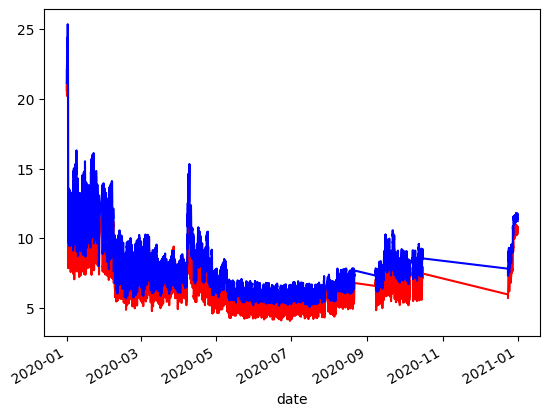

In [22]:
df_dew1['normalised'].plot(c='r')
df_dew2['normalised'].plot(c='b')

In [23]:
model_config={
    'time_budget': 30,  # Total running time in seconds
    'metric': 'rmse', #
}

In [24]:
df1a.columns

Index(['rowid', 'ssrd', 'v10', 't2m', 'sp', 'blh', 'value', 'tcc', 'd2m',
       'rh2m', 'tp', 'u10', 'date', 'date_unix', 'day_julian', 'weekday',
       'hour', 'set'],
      dtype='object')

In [25]:
df_dew, mod_stats=normet.do_all(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-07-02 15:33:23 : Training AutoML...
2024-07-02 15:33:54 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-07-02 15:33:54 : Normalising the dataset using the trained model in parallel.
2024-07-02 15:33:56 : Aggregating 100 predictions...


In [26]:
df_dew, mod_stats=normet.do_all(df1a,automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-07-02 15:33:56 : Normalising the dataset using the trained model in parallel.
2024-07-02 15:33:57 : Aggregating 100 predictions...


In [27]:
df_dew, mod_stats=normet.do_all(df1a,automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],weather_df=weather_df,model_config=model_config,n_samples=100)

2024-07-02 15:33:57 : Normalising the dataset using the trained model in parallel.
2024-07-02 15:33:58 : Aggregating 100 predictions...


<Axes: xlabel='date'>

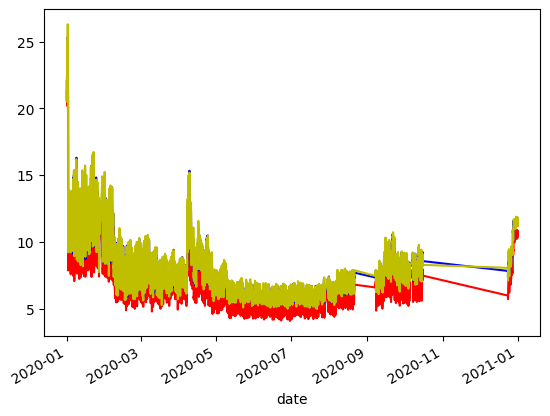

In [28]:
df_dew1['normalised'].plot(c='r')
df_dew2['normalised'].plot(c='b')
df_dew['normalised'].plot(c='y')

In [29]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,1593,0.912116,0.065145,1.948816,0.007081,0.211829,2.796755,0.936845,***,0.645061,0.822530,0.877679,testing
1,4780,0.971967,-0.013397,0.655479,-0.001470,0.071933,0.868739,0.994758,***,0.880270,0.940135,0.989543,training
2,6373,0.957006,0.006235,0.978762,0.000683,0.107153,1.587833,0.981282,***,0.821371,0.910685,0.962915,all


In [30]:
df_dew, mod_stats=normet.do_all_unc(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],n_samples=100,n_models=5)

2024-07-02 15:35:02 : Progress: 20.00% (Model 1/5)... ETA: 4.19 minutes
2024-07-02 15:36:26 : Progress: 40.00% (Model 2/5)... ETA: 3.67 minutes
2024-07-02 15:37:30 : Progress: 60.00% (Model 3/5)... ETA: 2.35 minutes
2024-07-02 15:38:36 : Progress: 80.00% (Model 4/5)... ETA: 1.16 minutes
2024-07-02 15:39:48 : Progress: 100.00% (Model 5/5)... ETA: 0.00 seconds


In [31]:
#Resampling from given dataset
df_dew, mod_stats=normet.do_all(df1,value='PM2.5',weather_df=df1.loc['2020-01-01':'2020-04-01',:],feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=300)

2024-07-02 15:39:48 : Training AutoML...
2024-07-02 15:40:19 : Best model is xgboost with best model parameters of {'n_estimators': 93, 'max_leaves': 68, 'min_child_weight': 0.005260883331373996, 'learning_rate': 0.12916561784126868, 'subsample': 1.0, 'colsample_bylevel': 0.6188671396440951, 'colsample_bytree': 0.8948451043832981, 'reg_alpha': 0.03039246163512742, 'reg_lambda': 3.5407198469840266}
2024-07-02 15:40:19 : Normalising the dataset using the trained model in parallel.
2024-07-02 15:40:21 : Aggregating 300 predictions...


In [32]:
df_dew.head()

,observed,normalised
date,,
2020-01-01 00:00:00,58.1,23.369534
2020-01-01 01:00:00,43.2,21.971931
2020-01-01 02:00:00,43.0,21.691652
2020-01-01 03:00:00,42.8,22.282705
2020-01-01 04:00:00,36.8,21.531300


# Time series decomposition

In [33]:
df_dewca, mod_stats=normet.decom_emi(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], split_method = 'random', fraction=0.75, n_samples=300)

2024-07-02 15:40:21 : Training AutoML...
2024-07-02 15:41:22 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-07-02 15:41:22 : Subtracting base...
2024-07-02 15:41:26 : Subtracting date_unix... ETA: 13.30 seconds
2024-07-02 15:41:29 : Subtracting day_julian... ETA: 9.65 seconds
2024-07-02 15:41:32 : Subtracting weekday... ETA: 6.34 seconds
2024-07-02 15:41:35 : Subtracting hour... ETA: 3.15 seconds


In [34]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.818041,20.771057,1.522188,0.589029,-0.682137,22.864885,0.664746
2020-01-01 01:00:00,43.2,9.692105,21.108507,1.625845,0.505590,-0.538025,23.240728,0.538811
2020-01-01 02:00:00,43.0,8.911392,21.242676,1.750687,0.683084,-0.605843,22.828701,-0.241902
2020-01-01 03:00:00,42.8,8.811673,21.473623,1.746353,0.573212,-0.785749,22.665817,-0.341621
2020-01-01 04:00:00,36.8,8.689767,21.652887,1.853514,0.659945,-0.764317,22.938501,-0.463528
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,8.585531,10.737784,1.087622,0.078158,0.046932,11.382733,-0.567763
2020-12-31 20:00:00,11.0,10.310694,9.930680,0.563858,0.074872,-0.047103,11.679707,1.157399
2020-12-31 21:00:00,15.3,8.988753,10.922729,1.009412,0.065480,-0.096726,11.736354,-0.164541


In [35]:
df_dewca, mod_stats=normet.decom_emi(df1a, model=automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-07-02 15:41:38 : Subtracting base...
2024-07-02 15:41:42 : Subtracting date_unix... ETA: 13.68 seconds
2024-07-02 15:41:45 : Subtracting day_julian... ETA: 9.82 seconds
2024-07-02 15:41:48 : Subtracting weekday... ETA: 6.51 seconds
2024-07-02 15:41:51 : Subtracting hour... ETA: 3.28 seconds


In [36]:
df_dewcb, mod_stats=normet.decom_met(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321, n_cores=-1)

2024-07-02 15:41:54 : Training AutoML...
2024-07-02 15:42:56 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-07-02 15:42:56 : Subtracting deweathered...
2024-07-02 15:42:59 : Subtracting blh... ETA: 30.31 seconds
2024-07-02 15:43:15 : Subtracting u10... ETA: 1.42 minutes
2024-07-02 15:43:17 : Subtracting d2m... ETA: 57.68 seconds
2024-07-02 15:43:20 : Subtracting sp... ETA: 42.03 seconds
2024-07-02 15:43:22 : Subtracting v10... ETA: 31.59 seconds
2024-07-02 15:43:24 : Subtracting t2m... ETA: 23.81 seconds
2024-07-02 15:43:27 : Subtracting tp... ETA: 17.76 seconds
2024-07-02 15:43:29 : Subtracting tcc... ETA: 12.48 seconds
2024-07-02 15:43:31 : Subtracting ssrd... ETA: 7.85 second

In [37]:
df_dewcb, mod_stats=normet.decom_met(df1a, model=automl, feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321, n_cores=-1)

2024-07-02 15:43:35 : Subtracting deweathered...
2024-07-02 15:43:38 : Subtracting blh... ETA: 29.56 seconds
2024-07-02 15:43:41 : Subtracting u10... ETA: 25.54 seconds
2024-07-02 15:43:43 : Subtracting d2m... ETA: 22.15 seconds
2024-07-02 15:43:46 : Subtracting sp... ETA: 18.71 seconds
2024-07-02 15:43:48 : Subtracting v10... ETA: 15.85 seconds
2024-07-02 15:43:50 : Subtracting t2m... ETA: 12.79 seconds
2024-07-02 15:43:52 : Subtracting tp... ETA: 10.00 seconds
2024-07-02 15:43:55 : Subtracting tcc... ETA: 7.35 seconds
2024-07-02 15:43:57 : Subtracting ssrd... ETA: 4.81 seconds
2024-07-02 15:43:59 : Subtracting rh2m... ETA: 2.36 seconds


In [38]:
df_dewcb

,observed,deweathered,blh,u10,d2m,sp,v10,t2m,tp,tcc,ssrd,rh2m,met_noise
date,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,22.901173,2.836161,15.604862,13.587896,3.097538,5.866673,4.960514,2.745457,1.875744,0.549713,0.259560,9.400610
2020-01-01 01:00:00,43.2,23.292109,1.189177,10.315523,9.737957,3.231026,5.882549,5.136097,2.986980,2.144737,1.239719,-0.278782,-0.640710
2020-01-01 02:00:00,43.0,22.924465,0.256285,6.793428,7.890728,3.230219,4.209715,4.523540,3.266563,2.793770,2.891846,1.370045,1.364532
2020-01-01 03:00:00,42.8,22.743603,-0.715023,5.472715,8.806717,3.530825,3.296532,4.832161,3.090843,2.553322,3.328106,1.673794,1.993581
2020-01-01 04:00:00,36.8,22.932659,-0.568703,1.299967,4.188303,3.709536,2.717278,3.678591,2.964827,2.129423,2.909874,1.866989,1.182835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,11.385867,-0.455450,-0.422625,0.088015,0.318190,0.369136,0.811306,0.746231,0.112481,0.086611,-0.232387,-0.272833
2020-12-31 20:00:00,11.0,11.653265,-0.537632,-0.469799,-0.009084,0.148226,0.304685,0.840990,0.799432,-0.425986,-0.424953,-0.174755,-0.571940
2020-12-31 21:00:00,15.3,11.793571,-0.544849,-0.665973,-0.141286,0.246484,0.345935,0.806517,0.782593,-0.488406,-0.453909,-0.044995,3.652803


In [39]:
df_dewca, mod_stats=normet.decom_emi(df1a, model=automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-07-02 15:44:00 : Subtracting base...
2024-07-02 15:44:04 : Subtracting date_unix... ETA: 12.13 seconds
2024-07-02 15:44:06 : Subtracting day_julian... ETA: 8.62 seconds
2024-07-02 15:44:09 : Subtracting weekday... ETA: 5.54 seconds
2024-07-02 15:44:11 : Subtracting hour... ETA: 2.74 seconds


In [40]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,8.610399,21.791830,1.449459,0.553579,-0.750149,22.521753,-0.522966
2020-01-01 01:00:00,43.2,8.532111,22.285461,1.942423,0.545198,-0.448908,23.722921,-0.601254
2020-01-01 02:00:00,43.0,9.324355,20.983826,1.732838,0.660833,-0.588243,22.980244,0.190989
2020-01-01 03:00:00,42.8,9.245863,20.863186,1.873583,0.566668,-0.807030,22.608904,0.112497
2020-01-01 04:00:00,36.8,9.607645,20.786596,1.793306,0.571714,-0.710558,22.915339,0.474279
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,9.225597,10.527438,1.018248,0.065087,0.030320,11.733325,0.092232
2020-12-31 20:00:00,11.0,9.635497,10.510927,0.788847,0.049502,-0.077022,11.774386,0.502131
2020-12-31 21:00:00,15.3,8.805655,10.579004,1.015028,0.096924,-0.112138,11.251107,-0.327711


# Rolling weather normalisation

In [41]:
df_dewc1, mod_stats=normet.rolling_dew(df1a, automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], n_samples=100,window_days=14, rollingevery=7)

2024-07-02 15:44:15 : Rolling window 0 from 2020-01-01 to 2020-01-15
2024-07-02 15:44:18 : Rolling window 10 from 2020-03-13 to 2020-03-27 ETA: 8.55 seconds
2024-07-02 15:44:21 : Rolling window 20 from 2020-05-22 to 2020-06-05 ETA: 5.58 seconds
2024-07-02 15:44:23 : Rolling window 30 from 2020-08-02 to 2020-08-16 ETA: 2.64 seconds


In [42]:
df_dewc1.head()

,observed,rolling_0,rolling_1,rolling_2,rolling_3,rolling_4,rolling_5,rolling_6,rolling_7,rolling_8,...,rolling_29,rolling_30,rolling_31,rolling_32,rolling_33,rolling_34,rolling_35,rolling_36,rolling_37,rolling_38
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,16.412506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,17.619698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,16.589432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,16.524757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,17.865799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

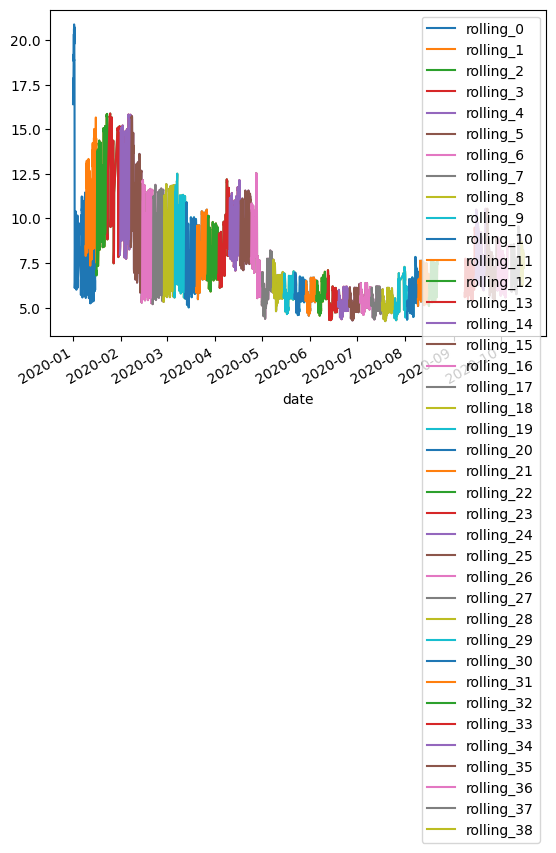

In [43]:
df_dewc1.iloc[:,1:].plot()

In [44]:
df_dewc2, mod_stats=normet.rolling_met(df1a, automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=100,window_days=14,rollingevery=7,fraction=0.75, seed=7654321, n_cores=-1)

2024-07-02 15:44:30 : Rolling window 0 from 2020-01-01 to 2020-01-15
2024-07-02 15:44:34 : Rolling window 10 from 2020-03-13 to 2020-03-27 ETA: 10.49 seconds
2024-07-02 15:44:37 : Rolling window 20 from 2020-05-22 to 2020-06-05 ETA: 6.98 seconds
2024-07-02 15:44:41 : Rolling window 30 from 2020-08-02 to 2020-08-16 ETA: 3.29 seconds


In [45]:
df_dewc2.head()

,observed,normalised,emi_mean_14,emi_std_14,met_short,met_season
date,,,,,,
2020-01-01 00:00:00,58.1,23.414051,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,23.385691,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,23.211742,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,22.295132,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,22.366114,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

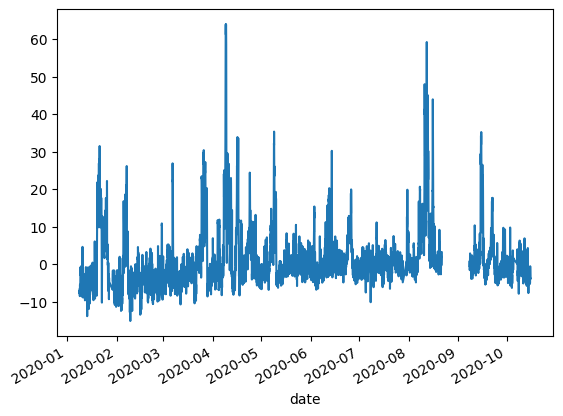

In [46]:
df_dewc2['met_short'].plot()

<Axes: xlabel='date'>

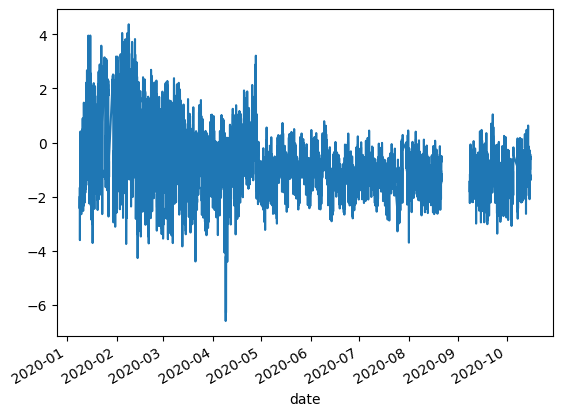

In [47]:
df_dewc2['met_season'].plot()

# Partial Dependence Plots

In [48]:
df1a=normet.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [49]:
df1a

,rowid,ssrd,v10,t2m,sp,blh,value,tcc,d2m,rh2m,tp,u10,date,date_unix,day_julian,weekday,hour,set
0,0,-1.164153e-10,1.545010,278.394725,102252.303312,384.209053,58.1,0.650958,277.183465,91.884130,0.000008,-2.720528,2020-01-01 00:00:00,1.577837e+09,1,3,0,training
1,1,-1.164153e-10,1.282742,277.772899,102211.168636,353.220263,43.2,0.603699,276.695430,92.715877,0.000002,-2.308789,2020-01-01 01:00:00,1.577840e+09,1,3,1,training
2,2,-1.164153e-10,0.758730,277.463419,102174.855967,255.911846,43.0,0.710378,276.505662,93.485560,0.000005,-2.216471,2020-01-01 02:00:00,1.577844e+09,1,3,2,testing
3,3,-1.164153e-10,0.509013,277.305813,102166.786485,191.375560,42.8,0.837765,276.412816,93.906363,0.000005,-1.928623,2020-01-01 03:00:00,1.577848e+09,1,3,3,training
4,4,-1.164153e-10,0.607069,277.478941,102142.578039,151.780210,36.8,0.819103,276.553051,93.696878,0.000003,-1.700043,2020-01-01 04:00:00,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,-5.820766e-11,-1.945195,273.557442,99902.506413,476.945688,11.7,0.918149,272.197565,90.582979,0.000000,1.380939,2020-12-31 19:00:00,1.609441e+09,366,4,19,training
6369,6369,-5.820766e-11,-2.102732,273.629146,99947.625909,486.665851,11.0,0.839639,272.171041,89.939908,0.000000,0.987925,2020-12-31 20:00:00,1.609445e+09,366,4,20,training
6370,6370,-5.820766e-11,-1.933668,273.470592,100000.215520,489.355002,15.3,0.739354,272.087408,90.422188,0.000000,0.681543,2020-12-31 21:00:00,1.609448e+09,366,4,21,testing
6371,6371,-5.820766e-11,-0.583816,272.926062,100042.844978,40.714872,17.1,0.643753,272.235319,95.088677,0.000000,1.020793,2020-12-31 22:00:00,1.609452e+09,366,4,22,training


In [50]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp_value=normet.pdp_all(automl,df1a,feature_names=all_features)

In [51]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,u10,-4.354032,10.963994,7.261466
1,u10,-4.242993,11.043289,7.309947
2,u10,-4.131954,11.042447,7.333392
3,u10,-4.020915,11.031183,7.338155
4,u10,-3.909875,11.040386,7.363017
...,...,...,...,...
1226,hour,19.000000,9.639515,7.460504
1227,hour,20.000000,9.578510,7.448645
1228,hour,21.000000,9.388046,7.372877
1229,hour,22.000000,9.182877,7.346088


# Change Points Detection

In [52]:
df_dewca.head()

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,8.610399,21.791830,1.449459,0.553579,-0.750149,22.521753,-0.522966
2020-01-01 01:00:00,43.2,8.532111,22.285461,1.942423,0.545198,-0.448908,23.722921,-0.601254
2020-01-01 02:00:00,43.0,9.324355,20.983826,1.732838,0.660833,-0.588243,22.980244,0.190989
2020-01-01 03:00:00,42.8,9.245863,20.863186,1.873583,0.566668,-0.807030,22.608904,0.112497
2020-01-01 04:00:00,36.8,9.607645,20.786596,1.793306,0.571714,-0.710558,22.915339,0.474279


In [53]:
import matplotlib.pyplot as plt

In [54]:
pt=normet.cpd_rupture(df_dewca.resample('1D').mean(),'date_unix',window=14, n=5)

In [55]:
pt

DatetimeIndex(['2020-02-09', '2020-04-04', '2020-04-14', '2020-04-24',
               '2020-05-09'],
              dtype='datetime64[ns]', name='date', freq=None)

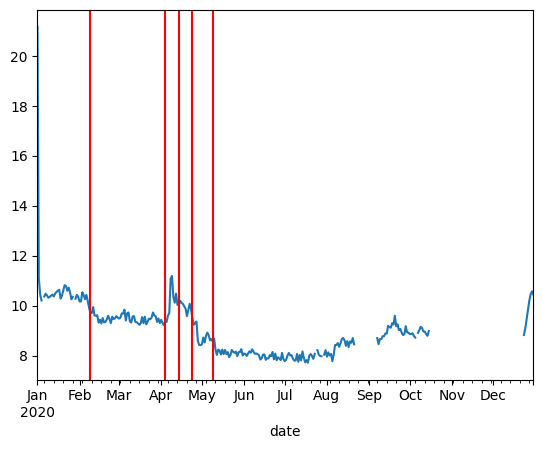

In [56]:
fig,ax=plt.subplots()
df_dewca['date_unix'].resample('1D').mean().plot()
for i in np.arange(len(pt)):
    ax.axvline(pt[i],c='r',label='ruptures')